This is my inferential statistics module for my capstone project 1.

In [1]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Hill HP 2015/Documents/Springboard/Capstone Project 1/cp1_data_clean.csv',index_col='Game')

In [2]:
# As a recap, I'll examine the summary of statistics for the dataset

df.describe()

,H Fenwick Close,H GF,H GA,H GlDiff,H PP%,H PK%,H sh%,H sv%,H PDO,H win streak,...,A GlDiff,A PP%,A PK%,A sh%,A sv%,A PDO,A win streak,A standing,A 5-5 F/A,Home Win
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,50.096074,83.640232,83.406190,0.234043,18.376209,81.646809,915.615087,915.916828,1000.301741,0.462282,...,-0.191489,18.399226,81.447389,916.558994,916.272727,999.713733,0.193424,8.135397,1.024662,0.586074
std,3.736658,28.415354,29.053636,16.634738,4.099238,4.211227,13.063975,13.503188,19.207603,2.638605,...,16.070463,4.796999,4.912444,13.034648,13.849310,18.587298,2.294524,4.294968,0.225060,0.493013
min,41.270000,28.000000,26.000000,-58.000000,10.400000,67.400000,871.000000,873.000000,958.000000,-7.000000,...,-61.000000,10.300000,28.300000,870.000000,880.000000,960.000000,-7.000000,1.000000,0.520000,0.000000
25%,47.190000,59.000000,60.000000,-11.000000,15.100000,78.700000,909.000000,907.000000,988.000000,-1.000000,...,-10.000000,15.200000,79.000000,910.000000,907.000000,986.000000,-1.000000,4.000000,0.870000,0.000000
50%,50.250000,84.000000,83.000000,-1.000000,17.900000,81.500000,917.000000,919.000000,1000.000000,1.000000,...,0.000000,17.900000,81.400000,917.000000,919.000000,1001.000000,-1.000000,8.000000,1.000000,1.000000
75%,52.980000,106.000000,105.000000,10.000000,21.000000,84.200000,924.000000,925.000000,1012.000000,2.000000,...,9.000000,20.800000,83.900000,925.000000,926.000000,1012.000000,2.000000,12.000000,1.170000,1.000000
max,60.330000,157.000000,164.000000,53.000000,34.600000,95.100000,952.000000,947.000000,1061.000000,15.000000,...,55.000000,79.400000,94.800000,953.000000,950.000000,1063.000000,11.000000,15.000000,1.830000,1.000000


Let's test an easy hypothesis first.  According to the summary, the home team won a little less than 60% of the games.  In a perfect world, that should be closer to 50%.  So, null hypothesis number one: the home team won 50% of the games.

In [3]:
# For this test, I'll create many samples of the season's worth of data under the assumption that a random number, 
# either 1 for home team wins or 0 for home team loses, represents the game result, and compare the means of the
# test season wins to the observed mean for the actual season wins

obs_win_mean = np.mean(df['Home Win'])

test_games = np.empty(len(df))
test_results = np.empty(10000)

for i in range(10000):
    for j in range(len(test_games)):
        test_games[j] = np.random.randint(2)
    test_results[i] = np.mean(test_games)
    
hyp_test_one_pval = sum(test_results >= obs_win_mean) / 10000
print('p-value for home team mean win test is',hyp_test_one_pval)

p-value for home team mean win test is 0.0


In [4]:
# Also, there's the Scipy one sample t-test for comparison

import scipy
from scipy import stats

t_test_tstat,t_test_pval = scipy.stats.ttest_1samp(df['Home Win'], 0.5)
print('t-statistic is',t_test_tstat)
print('p-value is',t_test_pval)

t-statistic is 3.96969061784
p-value is 8.21738323855e-05


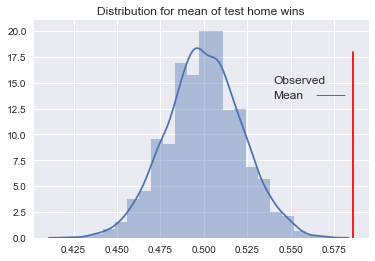

In [5]:
# Now I'll construct a histogram to show the distribution of the means of the test wins

sns.set(color_codes=True)
sns.distplot(test_results,bins=int(np.sqrt(517)))
plt.plot([(obs_win_mean),(obs_win_mean)],[0,18],color='red')
plt.title('Distribution for mean of test home wins')
plt.text(0.54,15,'Observed')
plt.text(0.54,13.5,'Mean')
plt.arrow(0.565,13.8,0.012,0)
plt.show()

Both p-values are very small and the histogram clearly shows the observed mean far greater than the test mean, so the null hypothesis can be rejected, since there is statistical evidence that the home team won more than 50% of the games.

Another easy hypothesis to test is between the goal difference for the home team and the away team.  According to the summary, the home team had a positive mean goal difference and the away team had a negative mean goal difference.  In a perfect world, those values would be the same.  So, null hypothesis number two: the difference between the mean goal differences of the home and away teams was 0.

In [6]:
# For this hypothesis, a two sample t-test should work well

t2_test_tstat, t2_test_pval = scipy.stats.ttest_ind(df['H GlDiff'],df['A GlDiff'],equal_var=False)

print('t-statistic from mean goal difference test is',t2_test_tstat)
print('p-value from mean goal difference test is',t2_test_pval)

t-statistic from mean goal difference test is 0.418322247182
p-value from mean goal difference test is 0.675798663093


Interesting.  The high p-value suggest the null hypothesis cannot be rejected.

From the story telling module, the 3 statistics that seem to have the most impact on team standing are goal difference, full strength goal ratio, and PDO or luck.  I'll see what the correlation coefficients for those are.  I'll use the Spearman test because I don't know if the distributions are normal.

In [11]:
from scipy.stats import spearmanr

h_gldiff_corr = spearmanr(df['H GlDiff'], df['H standing'])
h_fa_corr = spearmanr(df['H 5-5 F/A'], df['H standing'])
h_pdo_corr = spearmanr(df['H PDO'], df['H standing'])
a_gldiff_corr = spearmanr(df['A GlDiff'], df['A standing'])
a_fa_corr = spearmanr(df['A 5-5 F/A'], df['A standing'])
a_pdo_corr = spearmanr(df['A PDO'], df['A standing'])

print('Correlation of home goal difference to standing is',h_gldiff_corr.correlation)
print('Correlation of home full strength goal ratio to standing is',h_fa_corr.correlation)
print('Correlation of home pdo or luck to standing is',h_pdo_corr.correlation)
print('Correlation of away goal difference to standing is',a_gldiff_corr.correlation)
print('Correlation of away full strength goal ratio to standing is',a_fa_corr.correlation)
print('Correlation of away pdo or luck to standing is',a_pdo_corr.correlation)

Correlation of home goal difference to standing is -0.858594112885
Correlation of home full strength goal ratio to standing is -0.783239734024
Correlation of home pdo or luck to standing is -0.628317171207
Correlation of away goal difference to standing is -0.83393454621
Correlation of away full strength goal ratio to standing is -0.756080632326
Correlation of away pdo or luck to standing is -0.605594857676


They all have negative correlations, which was expected.  In both cases, the goal difference has a greater correlation than the full strength goal ratio, which in turn has a greater correlation than pdo.  And also in all cases, the correlations for the home teams are greater than the away teams.  Does this suggest the home teams have more influence on the outcome of the game, although not by much?

The desired outcome of this project is to find the probability of predicting a home win for a given game, so rather than look at standings, which are easier to visualize, I'll also run the correlation against the actual home win column.

In [12]:
h_gldiff_corr = spearmanr(df['H GlDiff'], df['Home Win'])
h_fa_corr = spearmanr(df['H 5-5 F/A'], df['Home Win'])
h_pdo_corr = spearmanr(df['H PDO'], df['Home Win'])
a_gldiff_corr = spearmanr(df['A GlDiff'], df['Home Win'])
a_fa_corr = spearmanr(df['A 5-5 F/A'], df['Home Win'])
a_pdo_corr = spearmanr(df['A PDO'], df['Home Win'])

print('Correlation of home goal difference to home team win is',h_gldiff_corr.correlation)
print('Correlation of home full strength goal ratio to home team win is',h_fa_corr.correlation)
print('Correlation of home PDO or luck to home team win is',h_pdo_corr.correlation)
print('Correlation of away goal difference to home team win is',a_gldiff_corr.correlation)
print('Correlation of away full strength goal ratio to home team win is',a_fa_corr.correlation)
print('Correlation of away PDO or luck to home team win is',a_pdo_corr.correlation)

Correlation of home goal difference to home team win is 0.108594861032
Correlation of home full strength goal ratio to home team win is 0.0769764024523
Correlation of home PDO or luck to home team win is -0.00313187820171
Correlation of away goal difference to home team win is -0.100108562433
Correlation of away full strength goal ratio to home team win is -0.0665165539607
Correlation of away PDO or luck to home team win is -0.0606635871359


Those are much smaller values.  However, the results are similar to the results versus the standing regarding the weight of the correlations.  Also, 2 of the home teams' values positively affect the home team winning and all of the away teams' values negatively affect the home team winning.  The away team values are no surprise, but apparently PDO, or luck, negatively affects the home teams' winning.  This time however, the PDO value for the away team has a greater correlation than for the home team, so, like the data visualization module, perhaps the away team wins more due to luck than the home team does.

Well then, like before, I'll try some of the other statistics that didn't seem as impactful as well.

In [13]:
h_fc_corr = spearmanr(df['H Fenwick Close'], df['Home Win'])
h_pp_corr = spearmanr(df['H PP%'], df['Home Win'])
h_pk_corr = spearmanr(df['H PK%'], df['Home Win'])
a_fc_corr = spearmanr(df['A Fenwick Close'], df['Home Win'])
a_pp_corr = spearmanr(df['A PP%'], df['Home Win'])
a_pk_corr = spearmanr(df['A PK%'], df['Home Win'])

print('Correlation of home fenwick close to home team win is',h_fc_corr.correlation)
print('Correlation of home power play % to home team win is',h_pp_corr.correlation)
print('Correlation of home penalty kill % to home team win is',h_pk_corr.correlation)
print('Correlation of away fenwick close to home team win is',a_fc_corr.correlation)
print('Correlation of away power play % to home team win is',a_pp_corr.correlation)
print('Correlation of away penalty kill % to home team win is',a_pk_corr.correlation)

Correlation of home fenwick close to home team win is 0.107594912024
Correlation of home power play % to home team win is 0.00660495470368
Correlation of home penalty kill % to home team win is 0.0890216906726
Correlation of away fenwick close to home team win is -0.0352729093513
Correlation of away power play % to home team win is -0.0715503978477
Correlation of away penalty kill % to home team win is -0.0516689223862


Well, those results are quite varied.  For home teams, fenwick close and penalty kill are as important as goal difference, while power play is much lower, even less than PDO.  But for away teams, the opposite seems to be true, power play has the greatest correlation, and fenwick close and penalty kill are lower, but still greater than PDO.  Together, all these results show some trends to look at for the final project analysis.  Ignoring the obvious goal difference, the home teams seemed to benefit most from full strength puck possession, penalty kill, and full strength goal ratio, and the away teams seemed to benefit most from full strength goal ratio, power play, and PDO, or luck.  That last part sounds perhaps disappointing for the away teams.  I'll have to see if my final results agree with these initial observations.